# **Visualización**
# AE06. Seaborn Gráfico de Barras

Veamos más tipos de gráficos en Seaborn:

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
sns.__version__ #Revisamos que estemos en la ultima versión de seaborn

'0.11.2'

In [3]:
# Importamos las librerias adicionales para el manejo numerico y de DataFrame
import numpy as np
import pandas as pd

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
penguins_df = pd.read_csv("/content/drive/MyDrive/02_Analisis Exploratorio y Estadistica/Archivos/VD02.csv").dropna()
penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male


## <font color='blue'>Gráficos de barras</font>

Para generar gráficos de barras tenemos múltiples opciones utilizando seaborn, pero siempre con la misma lógica de llamar simplemente a un método y obtener el gráfico asociado. En este caso el primer método corresponde a `sns.barplot(x=X, y=Y, data=df, ci='sd)`, el cual nos generara un gráfico de barras asociados a las variables que nosotros asignemos. Una cosa a notar es el parámetro `ci` el cual hace mención a intervalo de confianza, y que nosotros le hemos dado el valor de `'sd'`. Este método realizara una agregación de forma automática al momento de graficar:

[Documentación Barplot](https://seaborn.pydata.org/generated/seaborn.barplot.html?highlight=barplot#seaborn.barplot)


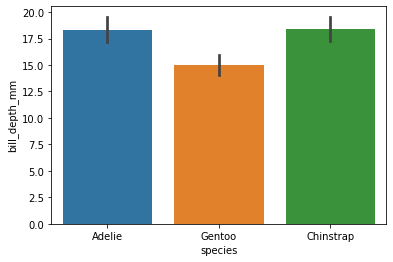

In [6]:
sns.barplot(x='species', y ='bill_depth_mm', ci='sd',
            data=penguins_df)
plt.show()

In [7]:
penguins_df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


**¿Qué será lo que está graficando?**

In [ ]:
penguins_df.groupby("species")['bill_depth_mm'].agg(['mean','std'])

,mean,std
species,,
Adelie,18.347260,1.219338
Chinstrap,18.420588,1.135395
Gentoo,14.996639,0.985998


La respuesta es el promedio y la desviación estándar para dichas columnas. Nosotros podríamos cambiar el método de agregación utilizando el parámetro `agg` y asignándole como valor una función. Ejemplo de una modificación donde muestre el conteo de elementos no nulos y sin barras de "error":

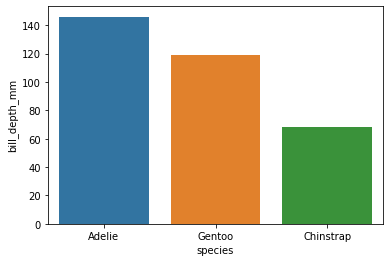

In [ ]:
# Dejamos el parametro ci=None para que evite calcular un intervalo de confianza
# y modificamos la función de agregación presente en el parametro `estimator`
sns.barplot(x='species', y ='bill_depth_mm', ci=None, estimator=pd.Series.count, 
            data=penguins_df)
plt.show()

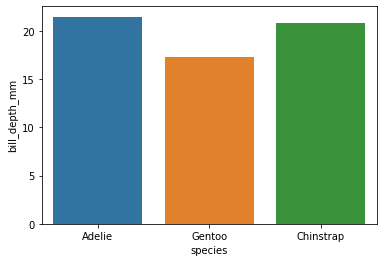

In [ ]:
# Dejamos el parametro ci=None para que evite calcular un intervalo de confianza
# y modificamos la función de agregación presente en el parametro `estimator`
sns.barplot(x='species', y ='bill_depth_mm', ci=None, estimator=np.max, 
            data=penguins_df)
plt.show()

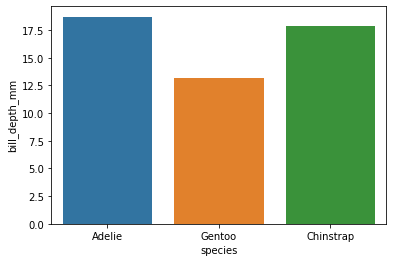

In [ ]:
# Dejamos el parametro ci=None para que evite calcular un intervalo de confianza
# y modificamos la función de agregación presente en el parametro `estimator`
sns.barplot(x='species', y ='bill_depth_mm', ci=None, estimator=lambda x: x.iloc[0], 
            data=penguins_df)
plt.show()

Alternativamente, existe un método genérico asociado a las variables categorías llamado: `sns.catplot`. Este método puede generar gráficos asociados a las variables categóricas de distinto tipo, utilizando el parámetro `kind` y para generar el primer gráfico de barra visto, simplemente declaramos `kind="bar"`:

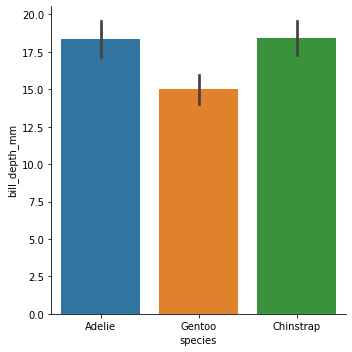

In [ ]:
sns.catplot(x="species", y="bill_depth_mm", kind="bar", data=penguins_df, ci='sd')
plt.show()

Además de `sns.barplot` y `sns.catplot`, tenemos el método `sns.countplot` el cual cuenta los elementos no nulos en las columna a graficar.

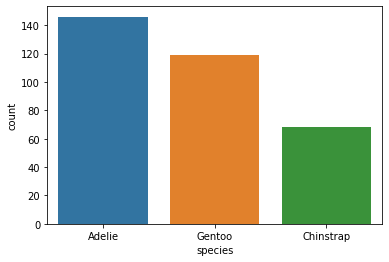

In [ ]:
sns.countplot(x='species',data=penguins_df)
plt.show()

Y a su vez, existe el `kind=count` en el método `sns.catplot`

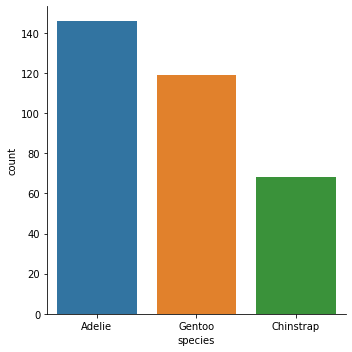

In [ ]:
sns.catplot(x="species", kind="count", data=penguins_df)

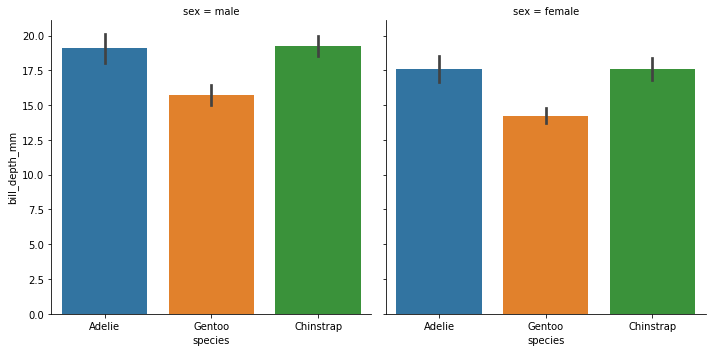

In [8]:
sns.catplot(x="species", y="bill_depth_mm", kind="bar", data=penguins_df, ci='sd', col='sex')
plt.show()

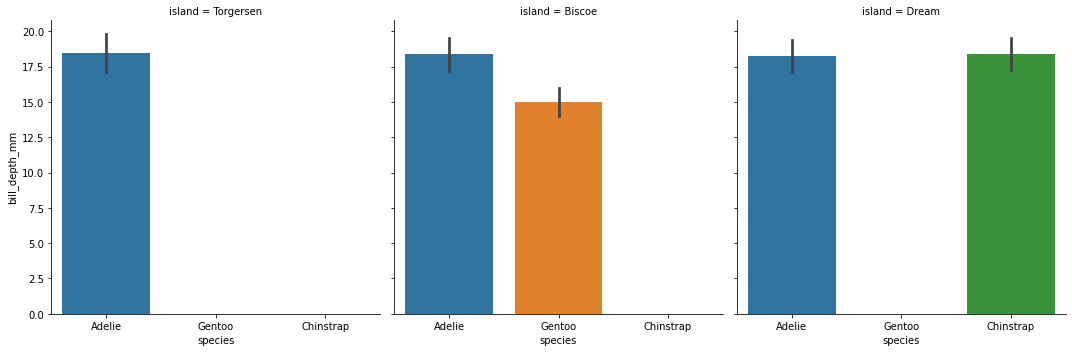

In [ ]:
sns.catplot(x="species", y="bill_depth_mm", kind="bar", data=penguins_df, ci='sd', col='island')
plt.show()